In [36]:
import pandas as pd
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import train_test_split as tt
from sklearn.ensemble import BaggingClassifier as bg
from sklearn.tree import DecisionTreeClassifier as dc 
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ad
from sklearn.ensemble import GradientBoostingClassifier as gr
from xgboost import XGBClassifier as xg
df=pd.read_csv("heart.csv")

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:


x=df.drop(columns=['target'])
y=df.iloc[:,-1]

In [39]:

xtr,xte,ytr,yte=tt(x,y,test_size=0.2)

BAGGING 

Decision Tree as base estimator

In [40]:


bag = bg(
    estimator=dc(max_depth=5),
    n_estimators=100,      
    max_samples=0.8,        
    bootstrap=True, oob_score=True        
    
)

In [41]:
bag.fit(xtr,ytr)
print("OOB Score:", bag.oob_score_)
yp=bag.predict(xte)
a2=ac(yte,yp)
print("Classification Report : ")
print(cr(yte,yp))

OOB Score: 0.9292682926829269
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       103
           1       0.86      1.00      0.92       102

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



KNN as base estimator

In [42]:

bag = bg(
    estimator=kn(),
    n_estimators=100,      
    max_samples=0.8,        
    bootstrap=True, oob_score=True        
    
)

In [43]:
bag.fit(xtr,ytr)
print("OOB Score:", bag.oob_score_)
yp=bag.predict(xte)
a3=ac(yte,yp)
print("Classification Report : ")
print(cr(yte,yp))

OOB Score: 0.748780487804878
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       103
           1       0.81      0.73      0.77       102

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



SVM as base estimator

In [44]:


bag = bg(
    estimator=SVC(),
    n_estimators=100,      
    max_samples=0.8,        
    bootstrap=True, oob_score=True        
    
)
bag.fit(xtr,ytr)
print("OOB Score:", bag.oob_score_)
yp=bag.predict(xte)
a4=ac(yte,yp)
print("Classification Report : ")
print(cr(yte,yp))

OOB Score: 0.6963414634146341
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       103
           1       0.70      0.83      0.76       102

    accuracy                           0.74       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.74      0.74       205



BAGGING ACCURACY WITH VARIOUS BASE ESTIMATORS

Text(0.5, 1.0, 'BAGGING ACCURACY WITH VARIOuS BASE ESTIMATORS')

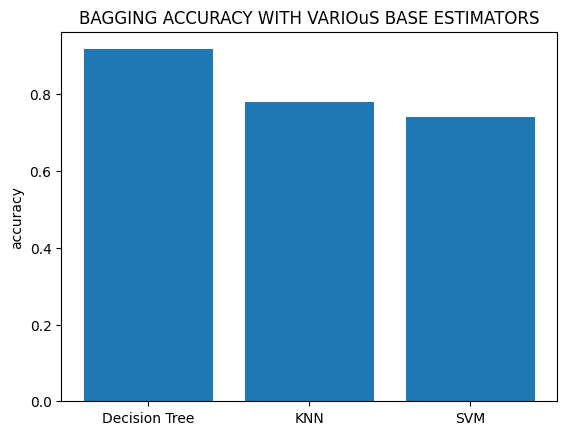

In [45]:
acc=[a2,a3,a4]
met=["Decision Tree","KNN","SVM"]
plt.bar(met,acc)
plt.ylabel('accuracy')
plt.title('BAGGING ACCURACY WITH VARIOuS BASE ESTIMATORS')

BOOSTING

ADA BOOST

In [50]:


boost = ad(
    estimator=dc(max_depth=1),   # weak learner
    n_estimators=100,     # number of weak learners
    learning_rate=0.4,    # controls contribution of each learner
   
)

boost.fit(xtr,ytr)
yp=boost.predict(xte)
a5=ac(yte,yp)
print("Classification Report : ")
print(cr(yte,yp))


Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       103
           1       0.83      0.94      0.88       102

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



<!-- BOOSTING - GRADIENT -->

GRADIENT BOOST

In [51]:


gb = gr(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # shrinkage factor
    max_depth=2,          # depth of each tree
    random_state=42`
)

gb.fit(xtr, ytr)
yp = gb.predict(xte)

a6=ac(yte,yp)
print("Classification Report : ")
print(cr(yte,yp))


Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       103
           1       0.93      0.97      0.95       102

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



XG Boost

In [60]:


x = xg(
    n_estimators=100,        # number of boosting rounds
    learning_rate=0.1,       # step size shrinkage
    max_depth=5,             # depth of trees
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
m.fit(xtr, ytr)


yp = m.predict(xte)

# Evaluation
a7= ac(yte, yp)
print("\nClassification Report:\n", cr(yte, yp))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:05:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Text(0, 0.5, 'accuracy')

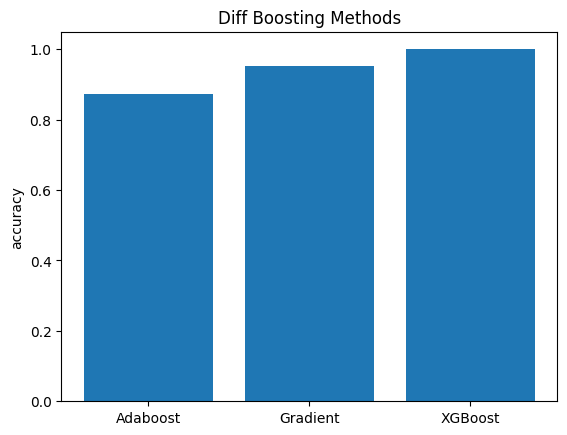

In [64]:
acc=[a5,a6,a7]
met=["Adaboost","Gradient","XGBoost"]
plt.bar(met,acc)
plt.title('Diff Boosting Methods')
plt.ylabel('accuracy')